In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


import string


# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\achyu\AppData\Roaming\

True

In [2]:

dataset = pd.read_csv('fake reviews dataset.csv')
dataset.tail()

,category,rating,label,text_
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,OR,I work in the wedding industry and have to wor...


In [3]:
# dataset = dataset.sample(frac=0.01, random_state=42)

In [4]:
print(dataset['label'].value_counts())
#print(dataset['category'].value_counts(normalize=True))
# print(dataset['category'].unique())
#print(dataset['rating'].value_counts())

label
CG    20216
OR    20216
Name: count, dtype: int64


In [5]:
# Check for null values
print(dataset.isnull().sum())

# Drop or fill missing data as necessary
dataset.dropna(inplace = True)


category    0
rating      0
label       0
text_       0
dtype: int64


In [6]:
#Storing the length of all the text into a separate column called 'length'
dataset['length'] = dataset['text_'].apply(len)


dataset[dataset['label']=='CG'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

'I was blown away by this movie, and the acting was superb. There were a few moments in the movie that I missed. The script and directing were top notch. The acting was flawless. The acting was excellent. The acting was superb. The special effects were excellent. The special effects were excellent. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The special effects were superb. The spe

In [7]:
# Encode 'label' column into binary format
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['label'] = le.fit_transform(dataset['label'])  # Fake(CG): 0, Genuine(OR): 1

dataset.tail()

,category,rating,label,text_,length
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,1694
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,1304
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",1987
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,1301
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,1768


In [8]:
#Coverting text to lowercase

dataset['small_text'] = dataset['text_'].str.lower()
dataset.tail()

,category,rating,label,text_,length,small_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,1694,i had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,1304,i wasn't sure exactly what it would be. it is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",1987,"you can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,1301,i liked nothing about this dress. the only rea...
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,1768,i work in the wedding industry and have to wor...


In [9]:
#Remove special characrers

def remove_punctuation(text):
  punctuations = string.punctuation
  return text.translate(str.maketrans('','',punctuations))
  # The first two arguments ('' and '') are empty strings, meaning there's nothing to replace and nothing to replace with. The third argument is a string of characters that will be removed from the text.

In [10]:
dataset['new_text'] = dataset['small_text'].apply(lambda X: remove_punctuation(X))

# apply function is used to apply a function to all the elements of a column

dataset.tail()

,category,rating,label,text_,length,small_text,new_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,1694,i had read some reviews saying that this bra r...,i had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,1304,i wasn't sure exactly what it would be. it is ...,i wasnt sure exactly what it would be it is a ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",1987,"you can wear the hood by itself, wear it with ...",you can wear the hood by itself wear it with t...
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,1301,i liked nothing about this dress. the only rea...,i liked nothing about this dress the only reas...
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,1768,i work in the wedding industry and have to wor...,i work in the wedding industry and have to wor...


In [11]:
# Removing Stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words("english"))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in STOPWORDS])

In [13]:
dataset['new_text'] = dataset['new_text'].apply(lambda X: remove_stopwords(X))
dataset.tail()

,category,rating,label,text_,length,small_text,new_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,1694,i had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,1304,i wasn't sure exactly what it would be. it is ...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",1987,"you can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,1301,i liked nothing about this dress. the only rea...,liked nothing dress reason gave 4 stars ordere...
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,1768,i work in the wedding industry and have to wor...,work wedding industry work long days feet outs...


In [14]:
# Removing of Frequent Words

from collections import Counter
word_count = Counter()

for text in dataset['new_text']:
  for word in text.split():
    word_count[word] += 1

word_count.most_common(10)

[('great', 16419),
 ('book', 15001),
 ('good', 14195),
 ('one', 13395),
 ('love', 10805),
 ('would', 10362),
 ('well', 10278),
 ('story', 9626),
 ('like', 9425),
 ('read', 8868)]

In [15]:
# Removing of rare Word

RARE_WORDS = set(word for (word,wc) in word_count.most_common()[:-10:-1])
print(RARE_WORDS)

{'gallbladder', 'hyvent', 'hippora', 'ducks', 'dwrthis', 'timemans', 'propertys', '32degrees', 'jacketit'}


In [16]:
import re
def remove_special_char(text):
  text = re.sub('[^a-zA-Z0-9]', ' ', text)
  text = re.sub(r'\s+', ' ',text)
  return text

In [17]:
dataset['new_text']= dataset['new_text'].apply(lambda X : remove_special_char(X)) 
dataset.tail()

,category,rating,label,text_,length,small_text,new_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,1694,i had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,1304,i wasn't sure exactly what it would be. it is ...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",1987,"you can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,1301,i liked nothing about this dress. the only rea...,liked nothing dress reason gave 4 stars ordere...
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,1768,i work in the wedding industry and have to wor...,work wedding industry work long days feet outs...


In [18]:
# Stemming

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
  return " ".join([ps.stem(word) for word in text.split()])

In [19]:
dataset['Stemmed_text'] = dataset['new_text'].apply(lambda X: stem_words(X))

In [20]:
dataset.head()

,category,rating,label,text_,length,small_text,new_text,Stemmed_text
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,"love this! well made, sturdy, and very comfor...",love well made sturdy comfortable love itvery ...,love well made sturdi comfort love itveri pretti
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,"love it, a great upgrade from the original. i...",love great upgrade original ive mine couple years,love great upgrad origin ive mine coupl year
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,this pillow saved my back. i love the look and...,pillow saved back love look feel pillow,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,"missing information on how to use it, but it i...",missing information use great product price,miss inform use great product price
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,very nice set. good quality. we have had the s...,nice set good quality set two months,nice set good qualiti set two month


In [21]:
from nltk import download
download('wordnet', force=True)
download('averaged_perceptron_tagger', force=True)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [22]:
import nltk


In [23]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

text = "NLTK is a powerful library for NLP."
tokens = word_tokenize(text)
tagged_tokens = pos_tag(tokens)

print(tagged_tokens)


[('NLTK', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('powerful', 'JJ'), ('library', 'NN'), ('for', 'IN'), ('NLP', 'NNP'), ('.', '.')]


In [25]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
wordnet_map = {'N':wordnet.NOUN, 'V':wordnet.VERB, 'J':wordnet.ADJ, 'R':wordnet.ADV}

def lemmatize_words(text):
  pos_text = pos_tag(text.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])


dataset['lemmatized_text'] = dataset['new_text'].apply(lambda X: lemmatize_words(X))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\achyu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [27]:
dataset.tail()

,category,rating,label,text_,length,small_text,new_text,Stemmed_text,lemmatized_text
40427,Clothing_Shoes_and_Jewelry_5,4.0,1,I had read some reviews saying that this bra r...,1694,i had read some reviews saying that this bra r...,read reviews saying bra ran small ordered two ...,read review say bra ran small order two band c...,read review say bra run small order two band c...
40428,Clothing_Shoes_and_Jewelry_5,5.0,0,I wasn't sure exactly what it would be. It is ...,1304,i wasn't sure exactly what it would be. it is ...,wasnt sure exactly would little large small si...,wasnt sure exactli would littl larg small size...,wasnt sure exactly would little large small si...
40429,Clothing_Shoes_and_Jewelry_5,2.0,1,"You can wear the hood by itself, wear it with ...",1987,"you can wear the hood by itself, wear it with ...",wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...,wear hood wear hood wear jacket without hood 3...
40430,Clothing_Shoes_and_Jewelry_5,1.0,0,I liked nothing about this dress. The only rea...,1301,i liked nothing about this dress. the only rea...,liked nothing dress reason gave 4 stars ordere...,like noth dress reason gave 4 star order size ...,like nothing dress reason give 4 star order si...
40431,Clothing_Shoes_and_Jewelry_5,5.0,1,I work in the wedding industry and have to wor...,1768,i work in the wedding industry and have to wor...,work wedding industry work long days feet outs...,work wed industri work long day feet outsid he...,work wed industry work long day foot outside h...


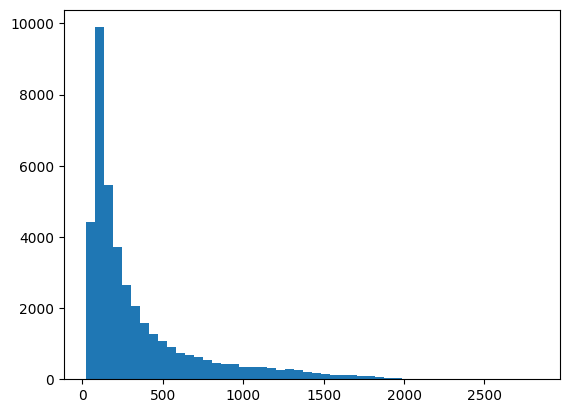

In [28]:
plt.hist(dataset['length'],bins=50)
plt.show()

In [29]:
dataset.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
0      20216.0  4.259893  1.141065  1.0  4.0  5.0  5.0  5.0  20216.0   
1      20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                  
             mean         std   min    25%    50%    75%     max  
label                                                             
0      305.573506  307.037430  24.0   96.0  174.0  383.0  1717.0  
1      396.970419  418.428047  28.0  121.0  224.0  498.0  2827.0

In [30]:
X = dataset[['rating', 'lemmatized_text']]
y = dataset['label']


In [31]:
# print(X)
# print(y)

In [32]:


from sklearn.feature_extraction.text import TfidfVectorizer

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
# Combine 'rating' and vectorized 'lemmatized_text'

from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the lemmatized_text column
tfidf_vectorizer = TfidfVectorizer()
X_lemmatized_tfidf = tfidf_vectorizer.fit_transform(X['lemmatized_text'])

X_combined_tfidf = hstack([X['rating'].values.reshape(-1, 1), X_lemmatized_tfidf])  

In [34]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_tfidf, y, test_size=0.2, random_state=1)


In [35]:
# print(X_train)

In [36]:
# from Logistic_Regression import LogisticRegression

In [37]:
# # Instantiate the Logistic Regression
# lr_model = LogisticRegression()


# # Note: Ensure that 'y_train' is in a compatible shape (1D array)
# lr_model.fit(X_train.toarray(), y_train.values)

# # Make predictions on the test set
# predictions = lr_model.predict(X_test.toarray())

# # Evaluate the Logistic Regression Model
# from sklearn.metrics import accuracy_score, classification_report

# print(f"Accuracy: {accuracy_score(y_test, predictions)}")
# print(classification_report(y_test, predictions))

In [41]:
# from SVM_C import SVM_Classifier

In [ ]:
# # Instantiate the SVM svm_model 
# svm_model = SVM_Classifier()

# # Fit the svm_model to the training data
# # Note: Ensure that 'y_train' is in a compatible shape (1D array)
# svm_model.fit(X_train.toarray(), y_train.values)

# # Make predictions on the test set
# predictions = svm_model.predict(X_test.toarray())

# # Evaluate the svm_model
# from sklearn.metrics import accuracy_score, classification_report

# print(f"Accuracy: {accuracy_score(y_test, predictions)}")
# print(classification_report(y_test, predictions))


In [ ]:
from sklearn.model_selection import train_test_split

# Assume X_combined_tfidf and y are your features and labels
X_subset, _, y_subset, _ = train_test_split(X_combined_tfidf, y, train_size=20000, random_state=1)

# Now split the subset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=1)


In [ ]:
from RandomForest import RandomForest

In [ ]:
# Instantiate the Random Forrest 
rf_model = RandomForest(n_trees=100, max_depth=6, n_jobs=2)


# Note: Ensure that 'y_train' is in a compatible shape (1D array)
rf_model.fit(X_train.toarray(), y_train.values)

# Make predictions on the test set
predictions = rf_model.predict(X_test.toarray())

# Evaluate the Random Forrest Model
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))


In [43]:
# import joblib

# joblib.dump(tfidf_vectorizer , 'tfidf_vectorizer.pkl')

# joblib.dump(lr_model , 'lr_model.pkl')

# joblib.dump(rf_model , 'rf_model.pkl')

# joblib.dump(svm_model , 'svm_model.pkl')
